Rezolvare exercitiul 1 - in folder, un pdf cu exercitiul scris pe foaie

Rezolvare exercitiul 2:

Eroare: Probabilitățile trebuie să fie 3 numere între 0 și 1 care însumează 1.
Eroare: Probabilitățile trebuie să fie 3 numere între 0 și 1 care însumează 1.
Vecinătățile:
S1: ['S2']
S2: ['S1', 'S3']
S3: ['S2', 'S4']
S4: ['S3', 'S5']
S5: ['S4', 'S6']
S6: ['S5']
Factorii rețelei:
+-------+-------+--------------+
| S1    | S2    |   phi(S1,S2) |
+=======+=======+==============+
| S1(0) | S2(0) |       0.7000 |
+-------+-------+--------------+
| S1(0) | S2(1) |       0.2000 |
+-------+-------+--------------+
| S1(0) | S2(2) |       0.1000 |
+-------+-------+--------------+
| S1(1) | S2(0) |       0.2000 |
+-------+-------+--------------+
| S1(1) | S2(1) |       0.6000 |
+-------+-------+--------------+
| S1(1) | S2(2) |       0.2000 |
+-------+-------+--------------+
| S1(2) | S2(0) |       0.1000 |
+-------+-------+--------------+
| S1(2) | S2(1) |       0.3000 |
+-------+-------+--------------+
| S1(2) | S2(2) |       0.6000 |
+-------+-------+--------------+
+-------+-------+----------

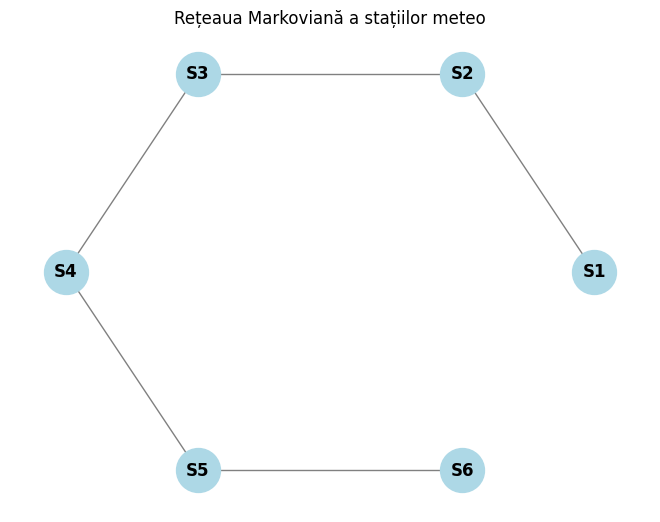


Predicțiile MAP pentru stările vremii la fiecare stație:
S1: Soare
S2: Soare
S3: Soare
S4: Soare
S5: Soare
S6: Soare


In [1]:
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def validate_probabilities(probabilities):
    if len(probabilities) != 3:
        return False
    if any(p < 0 or p > 1 for p in probabilities):
        return False
    if abs(sum(probabilities) - 1) > 1e-6:
        return False
    return True

def visualize_network(neighbors, n):
    G = nx.Graph()

    for i in range(n):
        G.add_node(f'S{i + 1}')

    for station, neighbors_list in neighbors.items():
        for neighbor in neighbors_list:
            G.add_edge(station, neighbor)

    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray')
    plt.title("Rețeaua Markoviană a stațiilor meteo")
    plt.show()

def main():
    n = int(input("Introdu numărul de stații meteo (număr întreg pozitiv): "))
    model = MarkovNetwork()
    stations = [f'S{i+1}' for i in range(n)]
    model.add_nodes_from(stations)

    neighbors = {station: [] for station in stations}
    for i in range(n):
        neighbor_input = input(f"Introdu vecinii pentru stația {stations[i]} (ex: 2 3 pentru vecinii S2 și S3): ")
        neighbor_indices = list(map(int, neighbor_input.split()))
        for neighbor in neighbor_indices:
            neighbor_station = f'S{neighbor}'
            if neighbor_station not in neighbors[stations[i]]:
                neighbors[stations[i]].append(neighbor_station)
            if stations[i] not in neighbors[neighbor_station]:
                neighbors[neighbor_station].append(stations[i])
            model.add_edge(stations[i], neighbor_station)

    potential_matrix = np.array([[0.7, 0.2, 0.1], 
                                 [0.2, 0.6, 0.2], 
                                 [0.1, 0.3, 0.6]])

    for station, neighbors_list in neighbors.items():
        for neighbor in neighbors_list:
            factor = DiscreteFactor(variables=[station, neighbor], 
                                    cardinality=[3, 3], 
                                    values=potential_matrix.flatten())
            model.add_factors(factor)

    for i in range(n):
        while True:
            initial_prob_input = input(f"Introdu probabilitățile inițiale pentru {stations[i]} (ex: 0.5 0.3 0.2): ")
            initial_probs = list(map(float, initial_prob_input.split()))
            if validate_probabilities(initial_probs):
                break
            else:
                print("Eroare: Probabilitățile trebuie să fie 3 numere între 0 și 1 care însumează 1.")
        
        initial_factor = DiscreteFactor(variables=[stations[i]], 
                                        cardinality=[3], 
                                        values=initial_probs)
        model.add_factors(initial_factor)

    print("Vecinătățile:")
    for station, neighbors_list in neighbors.items():
        print(f"{station}: {neighbors_list}")

    print("Factorii rețelei:")
    for factor in model.get_factors():
        print(factor)

    visualize_network(neighbors, n)

    bp = BeliefPropagation(model)
    map_result = bp.map_query(variables=stations)
    
    print("\nPredicțiile MAP pentru stările vremii la fiecare stație:")
    for station, state in map_result.items():
        weather = ["Soare", "Ploaie", "Nori"][state]
        print(f"{station}: {weather}")

if __name__ == "__main__":
    main()


Exercitiul 3:

a) Generarea imaginii originale
Imaginea 5X5 cu valori aleatoare intre 0 si 255 (diferite nuante de gri)

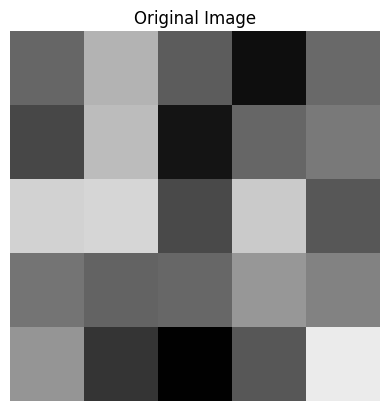

In [33]:
np.random.seed(42)
original_image = np.random.randint(0, 256, size=(5, 5)) # genereaza o matrice de 5x5 cu valori intregi aleatorii intre 0 si 255
plt.imshow(original_image, cmap='gray', vmin=0, vmax=255) # se afiseaza imaginea cu nuante de gri, cu intensitatea pixelilor intre 0 si 255
plt.title('Original Image')
plt.axis('off') # nu se afiseaza valorile de pe margini
plt.show() # afisarea efectiva a imaginii

b)Crearea imaginii zgomotoase
- se modifica aprox. 10% din pixelii imaginii originale

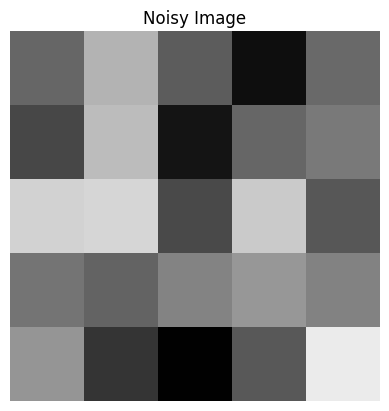

In [34]:
noisy_image = original_image.copy()
num_noisy_pixels = int(0.1 * original_image.size) # 10% din pixeli vor fi afectati
noisy_indices = np.unravel_index(
    np.random.choice(original_image.size, num_noisy_pixels, replace=False), # se aleg random pixeli care vor fi afectati de zgomot
    original_image.shape
)
noisy_image[noisy_indices] = np.random.randint(0, 256, size=num_noisy_pixels)
plt.imshow(noisy_image, cmap='gray', vmin=0, vmax=255)
plt.title('Noisy Image')
plt.axis('off')
plt.show()

c) Definirea retelei Markov
- adaugarea nodurilor si muchiilor intre pixelii vecini -> dependentele intre pixeli
- definirea functiei energie


In [35]:
model = MarkovNetwork()
pixels = [(i, j) for i in range(5) for j in range(5)]
model.add_nodes_from(pixels)
edges = []
for i in range(5):
    for j in range(5):
        if i < 4:
            edges.append(((i, j), (i+1, j)))
        if j < 4:
            edges.append(((i, j), (i, j+1)))
model.add_edges_from(edges)

In [36]:
num_levels = 8 # niveluri discrete
_lambda = 0.8 # parametru de regularizare

def discretize(value): # transofrma o valoare din 0-255 in 0-8
    return int(value * (num_levels - 1) / 255)

def undiscretize(level):
    return int(level * 255 / (num_levels - 1))

discretized_image = np.vectorize(discretize)(noisy_image) # se aplica functia 

In [37]:
unary_factors = {}
for i in range(5):
    for j in range(5):
        observed_value = discretized_image[i, j] # extrage valoarea discretizata 
        variable = (i, j)
        states = np.arange(num_levels) # creaza un vector care contine toate starile posibile ale pixelului (0-8)
        potential = np.exp(-_lambda * (states - observed_value) ** 2) # calculeaza potentialul unar pentru fiecare stare posibila
        unary_factors[variable] = potential / potential.sum() # normalizare a.i suma tuturor valorilor din potential sa fie 1


In [38]:
states = np.arange(num_levels) # se creeaza un vector ce contine toate starile
pairwise_potential = np.exp(- (np.subtract.outer(states, states)) ** 2) # se creeaza o matrice de potentiale perechi, facand ca valorile sa fie similare
pairwise_potential /= pairwise_potential.sum(axis=1, keepdims=True) # normalizare astfel incat suma sa fie 1
current_image = discretized_image.copy() 

In [39]:
def icm_iteration(image, unary_factors, pairwise_potential): # functie care realizeaza o iteratie a ICM
    new_image = image.copy()
    for i in range(5):
        for j in range(5):
            variable = (i, j)
            best_state = None # pastreaza starea care minimizeaza energia pentru pixelul curent
            best_energy = np.inf # pastreaza cea mai mica energie gasita pana acum

            # se testeaza fiecare stare posibila pentru pixel
            for state in range(num_levels):
                # se calculeaza energia asociata cu starea state
                energy = -np.log(unary_factors[variable][state])

                # se adauga energiile pereche de la vecini
                for neighbor in [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]:
                    if 0 <= neighbor[0] < 5 and 0 <= neighbor[1] < 5:
                        neighbor_state = image[neighbor]
                        energy += -np.log(pairwise_potential[state, neighbor_state])

                # se actualizeaza daca aceasta stare are energia mai mica
                if energy < best_energy:
                    best_energy = energy
                    best_state = state

            new_image[i, j] = best_state # se adauga cea mai buna stare
    return new_image

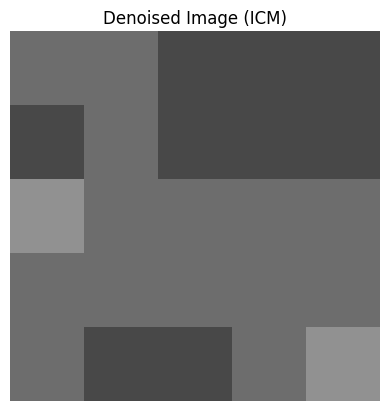

In [40]:

num_iterations = 10

for _ in range(num_iterations):
    current_image = icm_iteration(current_image, unary_factors, pairwise_potential)

denoised_image = np.vectorize(undiscretize)(current_image)

plt.imshow(denoised_image, cmap='gray', vmin=0, vmax=255)
plt.title('Denoised Image (ICM)')
plt.axis('off')
plt.show()